# Author : Akash Kothare

Data Science & Business Analytics Intern (Batch - Dec'20)

## Task 1: Prediction using Supervised ML


In this task, we have to develop a model to predict the percentage of marks a student is expected to score based on the number of hours he/she studied.
This is implemented using Simple Linear Regression involving 2 variables.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv('../input/tsf-datasets/student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking Null Values

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No Null values found, so no need to clean this data.

### Plotting the distribution of scores

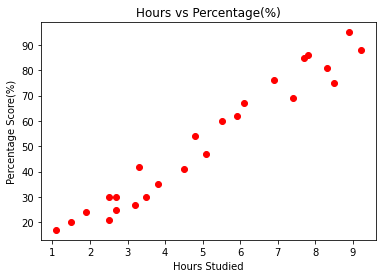

In [6]:
plt.scatter(df['Hours'], df['Scores'], color = 'red')
plt.title('Hours vs Percentage(%)')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score(%)")
plt.show()

### Preparing the data

In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

### Splitting the data into Training and Testing Sets

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Training the model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Model Trained!")

Model Trained!


### Plotting the Regression Line

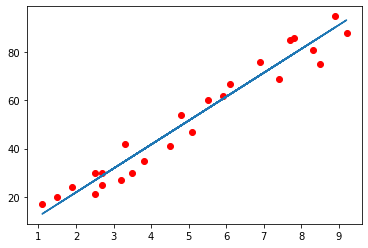

In [11]:
line = model.coef_*x + model.intercept_
plt.scatter(x, y, color = 'red')
plt.plot(x, line)
plt.show()

### Making Predictions

In [12]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


### Comparing Actual vs Predicted

In [13]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df1

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Testing with custom data 

In [14]:
hrs = [[2.9]]
predict = model.predict(hrs)
print("No. of Hours = {}".format(hrs))
print("Predicted Score = {}".format(predict[0]))

No. of Hours = [[2.9]]
Predicted Score = 30.763071437667122


### Evaluating the Model

In [15]:
from sklearn import metrics
print('Mean Absolute Error(MAE) :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE) :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE) : 4.130879918502486
Mean Squared Error(MSE) : 20.33292367497997
Root Mean Squared Error(RMSE) : 4.5092043283688055
